In [ ]:
# For the reproducibility of the code and get same data randomization
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
# loading and preparing the mnist fashion dataset
fashion_data = datasets.fashion_mnist
(train_img,train_label),(test_img,test_label) = fashion_data.load_data()

In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
train_label.shape

(60000,)

In [ ]:
test_img.shape

(10000, 28, 28)

In [ ]:
test_label.shape

(10000,)

In [ ]:
type(train_img)

numpy.ndarray

In [ ]:
type(train_label)

numpy.ndarray

In [ ]:
type(test_label)

numpy.ndarray

In [ ]:
type(test_img)

numpy.ndarray

In [ ]:
train_img[0].shape

(28, 28)

In [ ]:
# that means its a grayscale image and size 28x28 pixels
train_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

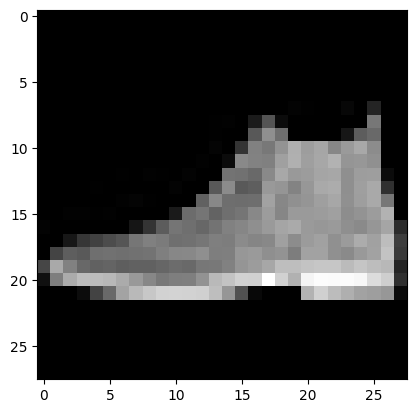

In [ ]:
# displaying the image from the dataset //
plt.imshow(test_img[0],cmap='gray')
plt.show()


In [ ]:
print(test_label[0])

9


In [ ]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# normalize the pixel values to be between 0 and 1
train_img = train_img/255
test_img = test_img/255

# performance and efficiency is going to be better after normalization as all values are in same range


In [ ]:
train_img[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Reshaping the images to specify that these are single channel
train_img = train_img.reshape((train_img.shape[0],28,28,1))
test_img = test_img.reshape((test_img.shape[0],28,28,1))

In [ ]:
train_img.shape

(60000, 28, 28, 1)

In [ ]:
test_img.shape

(10000, 28, 28, 1)

In [ ]:
# Convolutional Neural Network :

# Building the convolutional base //
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
# Adding the dense layers at the top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [ ]:
# training the model
history = model.fit(train_img,train_label,epochs=5,validation_data=(test_img,test_label))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4899 - acc: 0.8211 - val_loss: 0.3640 - val_acc: 0.8710
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3197 - acc: 0.8828 - val_loss: 0.3188 - val_acc: 0.8833
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2718 - acc: 0.8999 - val_loss: 0.3020 - val_acc: 0.8912
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2411 - acc: 0.9109 - val_loss: 0.2735 - val_acc: 0.8998
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2190 - acc: 0.9197 - val_loss: 0.2817 - val_acc: 0.9012


In [ ]:
# model evaluation //
loss,accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.2817 - acc: 0.9012


In [ ]:
print('test loss is : ',loss)
print('test accuracy is : ',accuracy)

test loss is :  0.28171512484550476
test accuracy is :  0.901199996471405


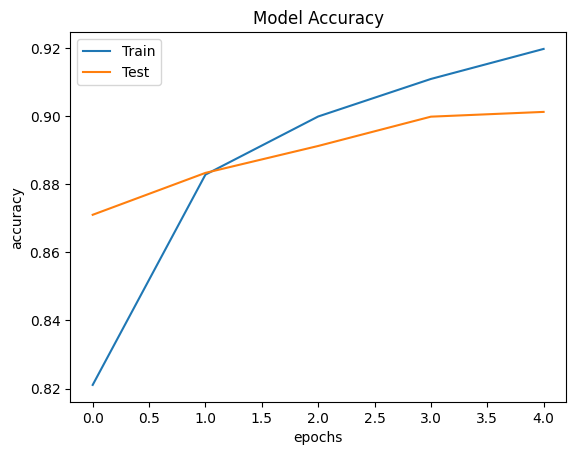

In [ ]:
# thats a good accuracy //
# plotting the curves for train and test -> accuracies
h = history
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

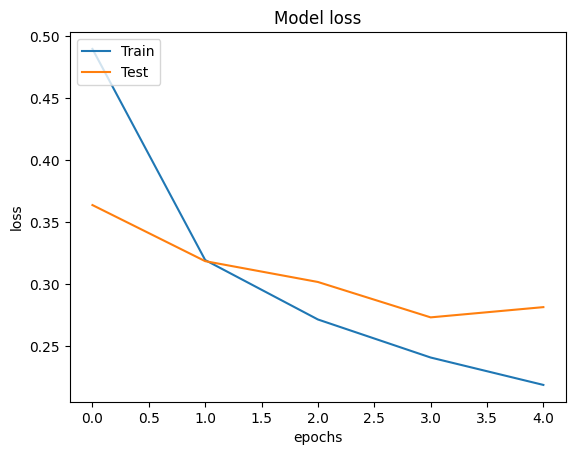

In [ ]:
# train acc > test acc , duet to slight overfitting of the model

# plotting the curves for train and test -> losses
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


In [ ]:
# loss is in inverse relation to the accuracy

In [ ]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print('Good Project')

In [ ]:
print('20+ LPA pls bg')